# 5. Aprendizaje por conjuntos

## Descripción

En este notebook se implementarán las técnicas de aprendizaje por conjuntos y se evaluarán sus resultados.

## Librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #Para normalizar los datos.
from sklearn.model_selection import train_test_split #Para dividir el dataset en train y test.
from sklearn.metrics import accuracy_score
from numpy.random import seed
import matplotlib.pyplot as plt
%matplotlib inline 


#Matrices de confusión
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Bosques aleatorios
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

## Carga de los datasets:

Norte de España:

In [2]:
excel_pob = pd.read_csv('excel_pob_variables.csv')
excel_pob

,MINMDT,MAXMDT,RANGEMDT,MEANMDT,STDMDT,MINPENDI,MAXPENDI,RANGEPENDI,MEANPENDI,STDPENDI,...,NFARMA,NCENTEDUC,DISTHOSPIT,DISTFARMA,DISTATPRIM,VIVTUR21,PLA21,CBMAS30,COB3G,COB4G
0,117,1394,1277,784.735210,233.924492,0.173360,46.501644,46.328284,20.298575,8.513073,...,1,2,16583.21167,5709.556279,5274.955751,2,13,0.00,0.96,0.94
1,271,2105,1834,1067.056635,382.986501,0.122584,61.203892,61.081307,22.556711,8.204898,...,4,10,19974.83089,4971.806926,3961.940782,58,264,1.00,1.00,1.00
2,99,2393,2294,817.504449,455.771315,0.346717,67.186058,66.839341,25.832286,11.384265,...,0,0,17540.29587,5485.216677,4285.074165,21,112,0.30,0.95,0.69
3,274,1113,839,506.502204,142.357363,0.122584,43.220619,43.098035,15.395220,6.130982,...,1,8,10146.40817,6522.937789,2496.420733,9,51,0.17,1.00,1.00
4,33,1151,1118,493.553497,218.406880,0.000000,42.763451,42.763451,17.966830,7.593164,...,2,0,15694.48914,3757.152641,4305.153512,15,72,0.75,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,139,300,161,189.077045,36.271257,0.000000,13.273371,13.273371,2.960418,2.437278,...,0,0,41271.99526,8612.545190,2227.740226,0,0,1.00,1.00,1.00
3685,831,1205,374,931.972503,73.191988,0.000000,26.876348,26.876348,7.047567,5.670949,...,0,0,35404.93621,18222.786360,2585.646631,0,0,0.95,1.00,1.00
3686,722,1129,407,863.795376,71.596410,0.173360,34.187431,34.014071,10.970295,5.792647,...,0,0,43033.52273,10831.081460,1943.478095,0,0,0.95,0.98,1.00
3687,241,770,529,413.819021,110.728010,0.000000,27.790625,27.790625,3.889147,3.862538,...,1,10,22120.23364,5762.972359,5572.568876,1,2,0.95,1.00,1.00


Cantabria:

In [3]:
excel_cantabria = pd.read_csv('excel_cantabria_variables.csv')
excel_cantabria

,MINMDT,MAXMDT,RANGEMDT,MEANMDT,STDMDT,MINPENDI,MAXPENDI,RANGEPENDI,MEANPENDI,STDPENDI,...,NFARMA,NCENTEDUC,DISTHOSPIT,DISTFARMA,DISTATPRIM,VIVTUR21,PLA21,CBMAS30,COB3G,COB4G
0,65,552,487,220.690553,104.095285,0.000000,31.196602,31.196602,11.105984,6.565275,...,1,0,13305.256790,6689.805575,1503.589655,9,79,0.60,0.98,0.98
1,-6,218,224,57.649513,42.324675,0.000000,23.273787,23.273787,5.522714,4.048844,...,2,4,6086.627482,3558.752869,1682.295735,156,814,0.99,1.00,1.00
2,-3,391,394,141.156113,83.474135,0.122584,33.228851,33.106267,8.968757,5.108402,...,0,2,9033.361309,4085.905018,1657.810817,64,322,0.96,1.00,1.00
3,203,942,739,467.784320,140.755881,0.173360,37.476574,37.303214,14.057126,5.779102,...,0,0,18892.149520,9992.467164,1794.658987,5,33,0.00,1.00,1.00
4,112,828,716,329.966152,142.751930,0.122584,36.627811,36.505227,12.574647,6.543079,...,0,0,18897.890150,5427.973068,2070.778547,3,10,0.98,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,247,1682,1435,716.320500,251.176248,0.122584,62.624386,62.501801,22.598704,8.880146,...,1,2,33837.993620,5052.512126,4048.590984,10,50,0.29,1.00,1.00
96,150,870,720,429.996782,182.276557,0.000000,39.624466,39.624466,12.713040,6.913056,...,1,2,24542.374170,3364.998813,2203.640557,23,169,1.00,1.00,1.00
97,0,437,437,112.661945,80.694858,0.122584,27.935255,27.812671,8.587506,5.689353,...,0,0,9800.767314,9562.771833,1269.354330,10,64,0.98,1.00,1.00
98,152,735,583,363.969076,136.276553,0.274105,29.921757,29.647651,10.768345,5.145302,...,0,0,22527.063100,7025.784394,2412.441843,0,0,0.49,1.00,1.00


Se obtienen los targets siguiendo la definición de despoblamiento explicada en los notebooks anteriores.

In [4]:
y_todas = pd.read_csv('y_esp.csv')
y_todas

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
3684,1.0
3685,1.0
3686,1.0
3687,0.0


In [5]:
y_todasC = pd.read_csv('y_can.csv')
y_todasC

,0
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
95,1.0
96,1.0
97,0.0
98,1.0


## Escalado de los datos:

Se comienza estandarizando los datos:

In [6]:
scaler = StandardScaler()
x = scaler.fit_transform(excel_pob)
excel_pobE = pd.DataFrame(x)

In [7]:
scaler = StandardScaler()
XC = scaler.fit_transform(excel_cantabria)
excel_cantabriaE = pd.DataFrame(XC)

In [8]:
col_names = excel_pob.columns.values.tolist() #Para añadir los nombres de las columnas, puesto que la función scaler los elimina.
col_namesC = excel_cantabria.columns.values.tolist()

Comprobamos los datasets:

In [9]:
excel_pobE.columns = col_names
excel_pobE

,MINMDT,MAXMDT,RANGEMDT,MEANMDT,STDMDT,MINPENDI,MAXPENDI,RANGEPENDI,MEANPENDI,STDPENDI,...,NFARMA,NCENTEDUC,DISTHOSPIT,DISTFARMA,DISTATPRIM,VIVTUR21,PLA21,CBMAS30,COB3G,COB4G
0,-1.894245,0.781234,2.365533,-0.096812,1.890307,0.634482,1.538169,1.536628,2.579642,1.694014,...,0.499487,0.254355,-0.698368,-0.428667,2.805476,-0.110127,-0.100200,-1.581559,-0.486454,0.034681
1,-1.367077,2.413963,3.840085,0.818884,3.728375,0.314077,2.579694,2.585560,2.999029,1.576189,...,2.955208,2.358199,-0.497689,-0.570246,1.524236,2.884533,2.402011,0.780057,0.218319,0.357077
2,-1.955862,3.075322,5.057847,0.009473,4.625877,1.728396,3.003478,2.994953,3.607376,2.791761,...,-0.319086,-0.271606,-0.641738,-0.471720,1.839549,0.905919,0.886728,-0.873075,-0.662647,-1.308636
3,-1.356807,0.135950,1.206011,-0.999248,0.761202,0.314077,1.305738,1.306959,1.668979,0.783265,...,0.499487,1.832238,-1.079227,-0.272575,0.094181,0.264206,0.278620,-1.180085,0.218319,0.357077
4,-2.181792,0.223212,1.944611,-1.041247,1.698961,-0.459451,1.273351,1.283171,2.146585,1.342303,...,1.318061,-0.271606,-0.750953,-0.803346,1.859143,0.585062,0.487969,0.189653,0.218319,0.357077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,-1.818936,-1.731011,-0.588865,-2.028802,-0.546934,-0.459451,-0.815761,-0.813558,-0.640442,-0.628955,...,-0.319086,-0.271606,0.762442,0.128434,-0.167998,-0.217079,-0.229797,0.780057,0.218319,0.357077
3685,0.549900,0.347217,-0.024988,0.380745,-0.091669,-0.459451,0.147890,0.153606,0.118633,0.607380,...,-0.319086,-0.271606,0.415294,1.972699,0.181247,-0.217079,-0.229797,0.661976,0.218319,0.357077
3686,0.176775,0.172692,0.062374,0.159616,-0.111343,0.634482,0.665816,0.661094,0.847171,0.653909,...,-0.319086,-0.271606,0.866669,0.554185,-0.445381,-0.217079,-0.229797,0.661976,-0.134067,0.357077
3687,-1.469772,-0.651710,0.385345,-1.299862,0.371184,-0.459451,0.212658,0.218611,-0.467957,-0.084033,...,0.499487,2.358199,-0.370748,-0.418417,3.095887,-0.163603,-0.209859,0.661976,0.218319,0.357077


In [10]:
excel_cantabriaE.columns = col_names
excel_cantabriaE

,MINMDT,MAXMDT,RANGEMDT,MEANMDT,STDMDT,MINPENDI,MAXPENDI,RANGEPENDI,MEANPENDI,STDPENDI,...,NFARMA,NCENTEDUC,DISTHOSPIT,DISTFARMA,DISTATPRIM,VIVTUR21,PLA21,CBMAS30,COB3G,COB4G
0,-0.402693,-0.585066,-0.515073,-0.571959,-0.484544,-0.617680,-0.750495,-0.745158,-0.240601,-0.168367,...,0.051709,-0.408267,-0.573005,0.286487,-1.032450,-0.592289,-0.479842,-0.092757,-0.348018,0.103243
1,-0.707666,-1.150462,-1.052907,-1.038143,-1.114631,-0.617680,-1.445488,-1.443370,-1.252196,-1.518940,...,0.698068,0.151003,-1.087375,-0.829832,-0.863504,2.879259,2.950267,0.809371,0.167564,0.223996
2,-0.694780,-0.857607,-0.705258,-0.799372,-0.694889,0.139471,-0.572225,-0.576865,-0.627831,-0.950273,...,-0.594651,-0.128632,-0.877403,-0.641886,-0.886652,0.706590,0.654194,0.739976,0.167564,0.223996
3,0.190071,0.075127,0.000266,0.134557,-0.110590,0.453093,-0.199613,-0.207002,0.294096,-0.590308,...,-0.594651,-0.408267,-0.174906,1.463990,-0.757277,-0.686752,-0.694515,-1.480646,0.167564,0.223996
4,-0.200810,-0.117853,-0.046769,-0.259507,-0.090229,0.139471,-0.274067,-0.277326,0.025496,-0.180280,...,-0.594651,-0.408267,-0.174497,-0.163396,-0.496238,-0.733984,-0.801852,0.786239,0.167564,0.223996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.379068,1.327800,1.423584,0.845198,1.015747,0.139471,2.006364,2.013668,1.841687,1.074028,...,0.051709,-0.128632,0.890074,-0.297260,1.373555,-0.568673,-0.615180,-0.809833,0.167564,0.223996
96,-0.037585,-0.046755,-0.038589,0.026511,0.312939,-0.617680,-0.011199,-0.002438,0.050570,0.018287,...,0.051709,-0.128632,0.227706,-0.898911,-0.370633,-0.261665,-0.059829,0.832502,0.167564,0.223996
97,-0.681894,-0.779738,-0.617323,-0.880846,-0.723239,0.139471,-1.036582,-1.043373,-0.696907,-0.638476,...,-0.594651,-0.408267,-0.822721,1.310790,-1.253892,-0.568673,-0.549844,0.786239,0.167564,0.223996
98,-0.028994,-0.275283,-0.318754,-0.162282,-0.156281,1.075354,-0.862325,-0.881662,-0.301776,-0.930469,...,-0.594651,-0.408267,0.084103,0.406274,-0.173235,-0.804832,-0.848520,-0.347204,0.167564,0.223996


## Partición en train y set

Juntamos primeramente las variables objetivo con el resto de variables en un mismo dataset para poder hacer la partición:

In [11]:
excel_pobE['y_todas'] = y_todas
excel_cantabriaE['y_todasC'] = y_todasC

In [12]:
#España
seed(2022)
train, test = train_test_split(excel_pobE, test_size=0.3)

#Cantabria
train_C, test_C = train_test_split(excel_cantabriaE, test_size=0.3)

Eliminamos los missing values, si los hubiera:

In [13]:
train = train.dropna()
test = test.dropna()

train_C = train_C.dropna()
test_C = test_C.dropna()

In [14]:
#Train
train_todas = train['y_todas']
train_todasC = train_C['y_todasC']

#Test
test_todas = test['y_todas']
test_todasC = test_C['y_todasC']

In [15]:
#Eliminamos la variable objetivo de los datasets.
train = train.drop(['y_todas'], axis=1)
train_C = train_C.drop(['y_todasC'], axis=1)

test = test.drop(['y_todas'], axis=1)
test_C = test_C.drop(['y_todasC'], axis=1)

## Random Forest

### España

Antes de comenzar a crear el modelo, es necesario ver cuántos árboles son necesarios introducir en el random forest. El siguiente fragmento de código está basado en el código que figura en la página oficial de sklearn para el error OOB: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

In [16]:
plt.rcParams["figure.figsize"] = (9,9) #Para hacer las figuras más grandes

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


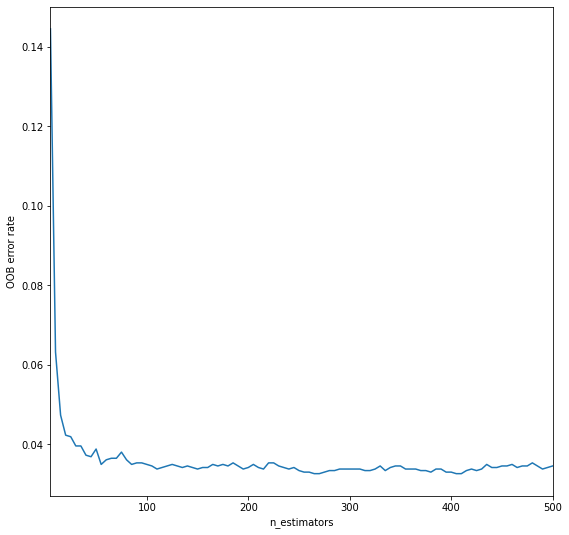

In [17]:
RANDOM_STATE=2022

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(train, train_todas)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

Una vez calculado el OOB error, se puede tomar una decisión sobre cuántos árboles considerar. En este caso, se puede ver que con 200 árboles sería suficiente.

In [18]:
rf_best = RandomForestClassifier(n_estimators = 200, max_features="sqrt", oob_score=True, random_state = 2022)

In [19]:
fit_best = rf_best.fit(train, train_todas)

Calculamos el accuracy:

In [20]:
score = rf_best.score(test, test_todas)
score

0.966576332429991

#### Features

Se comienza realizando algunas transformaciones a los datos.

In [21]:
labels = np.array(y_todas) #Convertimos en etiquetas los valores de la variable objetivo mediante numpy array.
feature_list = list(train.columns) #Guardamos los nombres de las columnas
features = np.array(train) #Se transoforma a un array

Visualicemos ahora las variables más importantes:

In [22]:
features_rf_best = pd.Series(rf_best.feature_importances_, index=excel_pob.columns)
features_rf_best = features_rf_best.sort_values(ascending=True)
features_rf_best = features_rf_best.tail(65)

In [23]:
features_rf_best

COB3G       0.000695
COB4G       0.000764
NHOSPI      0.000956
CBMAS30     0.002340
MINPENDI    0.002602
              ...   
TJUVEN03    0.044308
TJUVEN21    0.048228
TJUVEN10    0.059074
IENVEJ03    0.059084
NFARMA      0.088086
Length: 65, dtype: float64

Gráficamente:

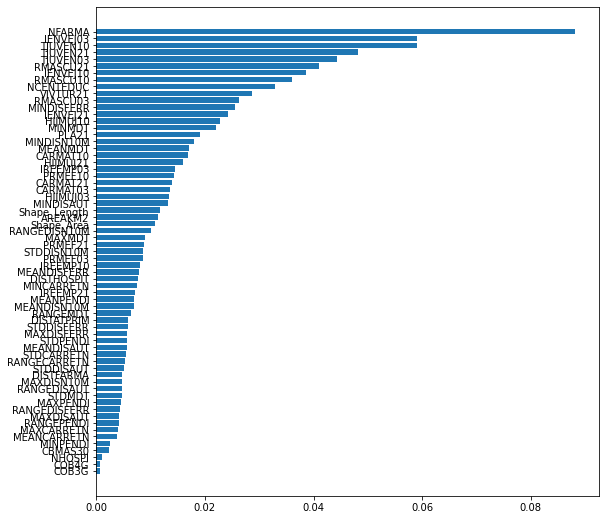

In [24]:
plt.barh(features_rf_best.index, features_rf_best)
plt.show()
plt.rcParams["figure.figsize"] = (12,12)

### Cantabria

Se repite el procedimiento anterior:

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


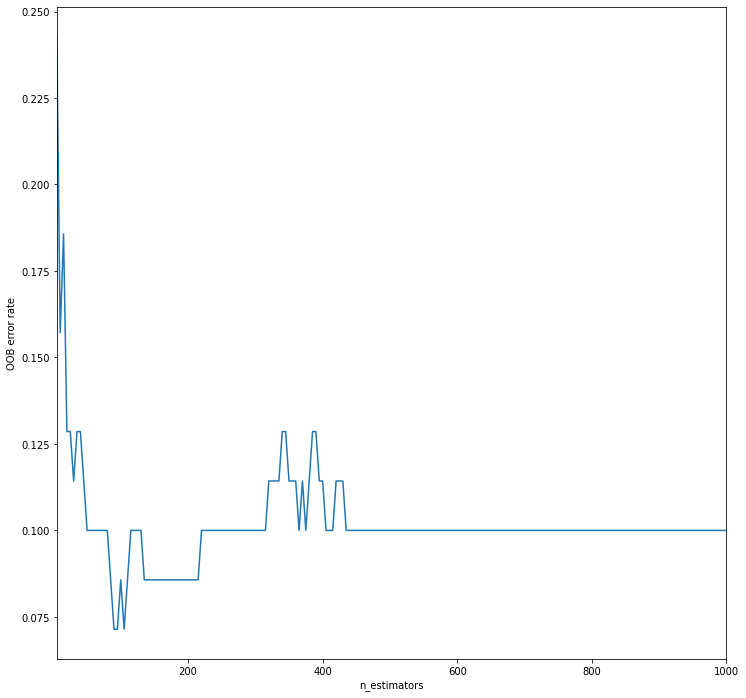

In [25]:
# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.

RANDOM_STATE=123

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(train_C, train_todasC)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

Se puede observar que el error se estabiliza sobre los 500 árboles.

In [26]:
rf_best_C = RandomForestClassifier(n_estimators = 500, max_features="sqrt", oob_score=True, random_state = 2022)

In [27]:
fit_best = rf_best_C.fit(train, train_todas)
score = rf_best_C.score(test, test_todas)
score

0.9683830171635049

### Features

In [28]:
features_rfC = pd.Series(rf_best_C.feature_importances_, index=excel_cantabria.columns)
features_rfC = features_rfC.sort_values(ascending=True)
features_rfC = features_rfC.tail(65)

In [29]:
features_rfC

COB3G       0.000656
NHOSPI      0.000763
COB4G       0.000984
CBMAS30     0.002234
MINPENDI    0.002694
              ...   
RMASCU21    0.043055
TJUVEN21    0.044912
IENVEJ03    0.052922
TJUVEN10    0.056528
NFARMA      0.093933
Length: 65, dtype: float64

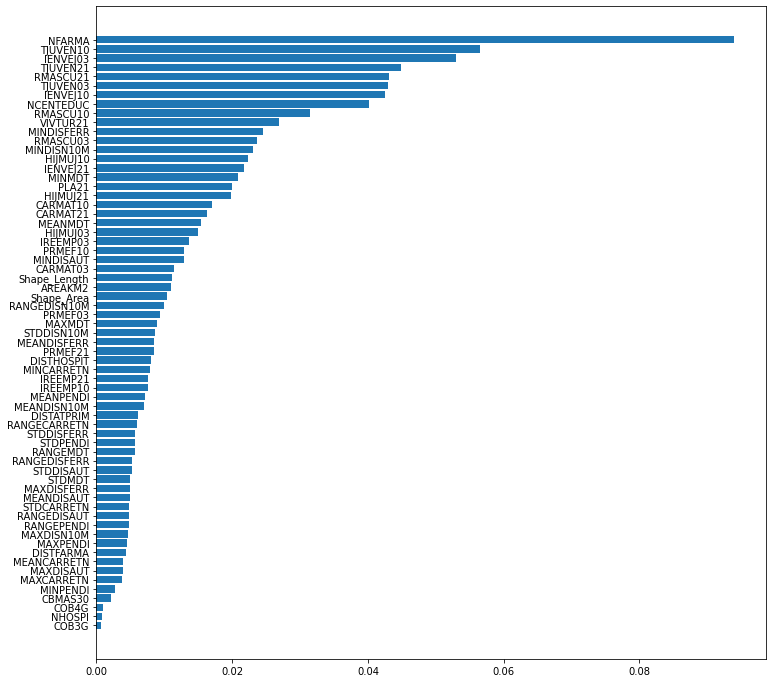

In [30]:
plt.barh(features_rfC.index, features_rfC)
plt.show()

## XGBoost

Por último, pasamos a crear los modelos para el Extreme Gradient Boosting.

#### España:

In [31]:
# Creación del modelo
modelo = XGBClassifier()
modelo.fit(train, train_todas)

XGBClassifier()

In [32]:
# Predicción
y_pred = modelo.predict(test)

In [33]:
#Transformamos las predicciones en 0 y 1.
prediccion = [1 if i > .5 else 0 for i in y_pred]

In [34]:
# Evaluamos
accuracy = accuracy_score(test_todas, prediccion)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.75%


In [35]:
#Calculamos la matriz de confusión
matriz_conf = confusion_matrix(test_todas, prediccion)

In [36]:
matriz_conf

array([[103,  18],
       [ 18, 968]])

In [37]:
#Vemos los valores de las variables más importantes
print(modelo.feature_importances_)

[0.01101432 0.01430047 0.00423226 0.00523351 0.         0.00628057
 0.         0.00374598 0.00840707 0.00383448 0.00699385 0.00332106
 0.02203647 0.00895761 0.01846672 0.01236647 0.00421792 0.00354254
 0.0076307  0.00433154 0.00454838 0.01209653 0.         0.00109621
 0.00830426 0.01439374 0.00564195 0.00995145 0.         0.0096896
 0.02432124 0.13382639 0.09900439 0.0220345  0.02515696 0.03752844
 0.06714296 0.03709575 0.00750698 0.01705505 0.00752629 0.00712119
 0.00870688 0.0061408  0.01532491 0.00879389 0.01092413 0.00686397
 0.00686782 0.01566212 0.03031589 0.01437481 0.01745213 0.
 0.         0.09371606 0.01869987 0.00434111 0.00188689 0.00255092
 0.01913842 0.01248096 0.         0.         0.00580261]


Una vez realizado el modelo y la evaluación queda por ver las variables de relevancia.

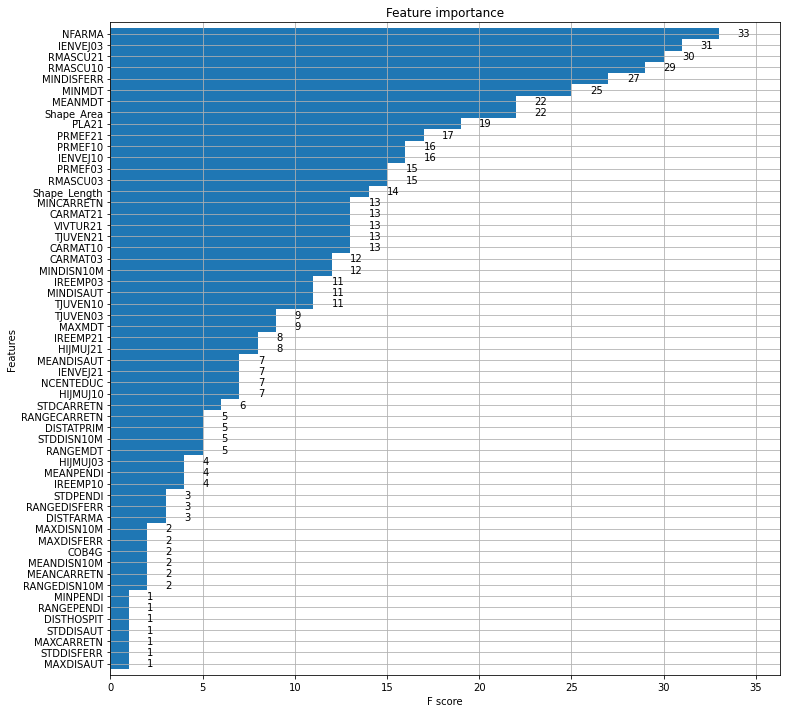

In [38]:
plot_importance(modelo, height=1, max_num_features=65)
plt.show()
plt.rcParams["figure.figsize"] = (9,9)

#### Cantabria:

In [39]:
modeloC = XGBClassifier()
modeloC.fit(train_C, train_todasC)

XGBClassifier()

In [40]:
y_predC = modeloC.predict(test_C)

In [41]:
prediccionC = [1 if i > .5 else 0 for i in y_predC]

Accuracy:

In [42]:
accuracyC = accuracy_score(test_todasC, prediccionC)
print("Accuracy: %.2f%%" % (accuracyC * 100.0))

Accuracy: 83.33%


In [43]:
 matriz_confC = confusion_matrix(test_todasC, prediccionC)

In [44]:
 matriz_confC

array([[ 7,  2],
       [ 3, 18]])

Variables de mayor relevancia:

In [45]:
print(modeloC.feature_importances_)

[0.08641633 0.         0.         0.03329667 0.         0.
 0.         0.         0.01998216 0.00441697 0.         0.02218115
 0.05864209 0.         0.         0.01599962 0.01558585 0.02225383
 0.         0.02081166 0.00536928 0.03329175 0.         0.
 0.02033713 0.00584725 0.         0.         0.         0.
 0.         0.0128481  0.         0.01699198 0.00411515 0.04671901
 0.23852868 0.03447439 0.09808833 0.         0.00954012 0.01962291
 0.01136346 0.00918713 0.01736804 0.         0.01666999 0.00596838
 0.         0.         0.02660246 0.0081752  0.0069566  0.
 0.         0.         0.         0.02668599 0.         0.00732272
 0.01833969 0.         0.         0.         0.        ]


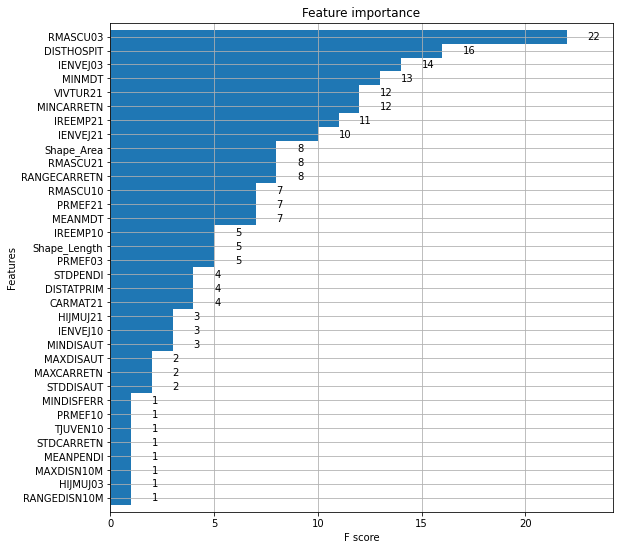

In [46]:
plot_importance(modeloC, height=1, max_num_features=65)
plt.show()
plt.rcParams["figure.figsize"] = (9,9)